In [1]:
import pandas as pd

In [7]:
df = pd.read_csv(r"C:\Users\risse\Downloads\E2_BigData\caso_base\dataset\credit_risk-dataset.csv")

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Probando Isolation Forest con Python

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

## Procesamiento de datos

In [12]:
labels_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    labels_encoders[column] = label_encoder

In [14]:
features = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"
]

In [15]:
x = df[features]

## Entrenamiento de datos

In [16]:
modelo = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
modelo.fit(x)

IsolationForest(contamination=0.1, random_state=42)

## Predicion de anomalias

In [17]:
df['anomalia_score'] = modelo.decision_function(x)
df['es_anomalia'] = modelo.predict(x)

anomalia_score es la puntuacion de anoamlia que asigna el modelo
es_anaomalia es la clasificacion si es 1 = normal y -1 = anomalia

In [18]:
df[['anomalia_score', 'es_anomalia']].head()

,anomalia_score,es_anomalia
0,-0.109835,-1
1,0.049452,1
2,-0.008508,-1
3,-0.051458,-1
4,-0.056457,-1


Identificamos las columnas

In [19]:
anomalias = df[df['es_anomalia'] == -1]
normal = df[df['es_anomalia'] == 1]

In [20]:
comparacion = pd.DataFrame({
    "Normal Mean": normal[features].mean(),
    "Anomalia Mean": anomalias[features].mean(),
    "Diferencia": anomalias[features].mean() - normal[features].mean()
})


In [21]:
comparacion

,Normal Mean,Anomalia Mean,Diferencia
person_age,26.626539,37.707489,11.080950
person_income,60367.440951,117443.267956,57075.827005
person_emp_length,4.486257,7.491716,3.005459
loan_amnt,8941.687413,15418.723143,6477.035730
loan_int_rate,10.944524,11.602280,0.657756
loan_percent_income,0.166532,0.203244,0.036712
cb_person_cred_hist_length,5.124203,11.924494,6.800291


El modelo detalla que de la media de edad, hay una valor que tiene 11 anios por encima de esta y la detecta como anomalia pero segun el contexto creo que esta bien y no deberia de ser considerada anomalia

## Analisis Exploratorio de las Anomalias

In [22]:
import matplotlib.pyplot as plt

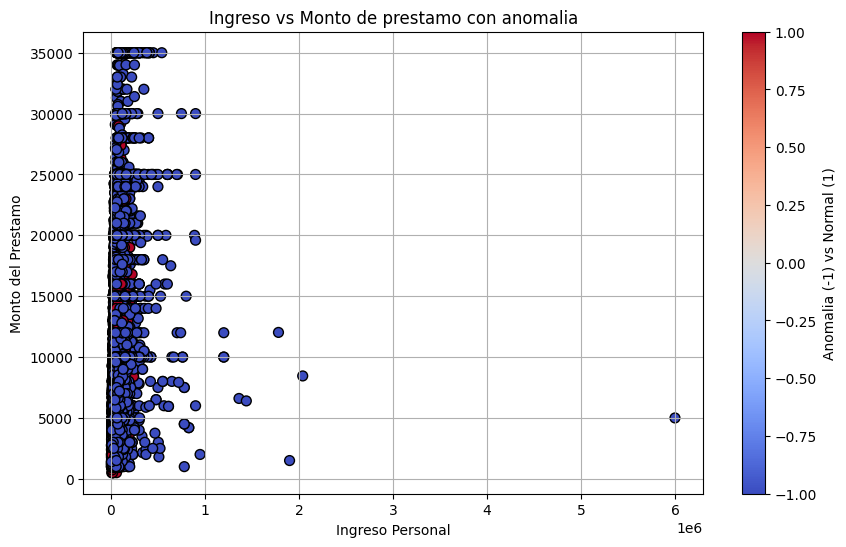

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['person_income'], df['loan_amnt'], c=df['es_anomalia'], cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(label="Anomalia (-1) vs Normal (1)")
plt.title("Ingreso vs Monto de prestamo con anomalia")
plt.xlabel("Ingreso Personal")
plt.ylabel("Monto del Prestamo")
plt.grid(True)
plt.show()

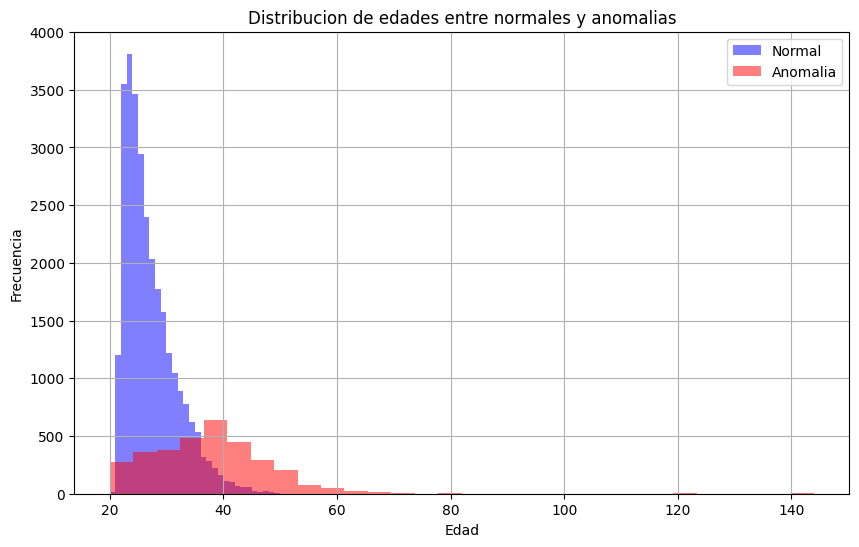

In [24]:

plt.figure(figsize=(10, 6))
plt.hist(normal['person_age'], bins=30, alpha=0.5, label='Normal', color='blue')
plt.hist(anomalias['person_age'], bins=30, alpha=0.5, label='Anomalia', color='red')
plt.title("Distribucion de edades entre normales y anomalias")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()


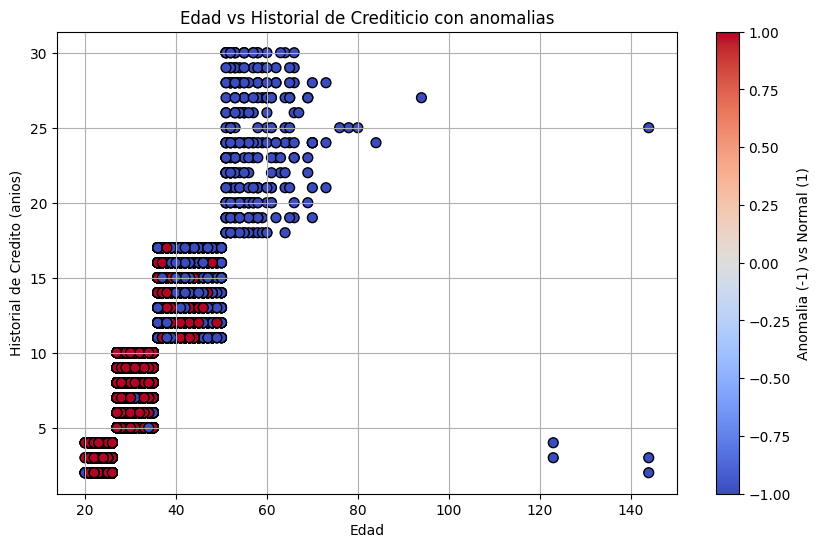

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['person_age'], df['cb_person_cred_hist_length'], c=df['es_anomalia'], cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(label="Anomalia (-1) vs Normal (1)")
plt.title("Edad vs Historial de Crediticio con anomalias")
plt.xlabel("Edad")
plt.ylabel("Historial de Credito (anios)")
plt.grid(True)
plt.show()
